# **Uge 11:** Ensidet variansanalyse - ANOVA

---


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.power as smp
import statsmodels.stats.proportion as smprop




## Variansanalyse - ANOVA

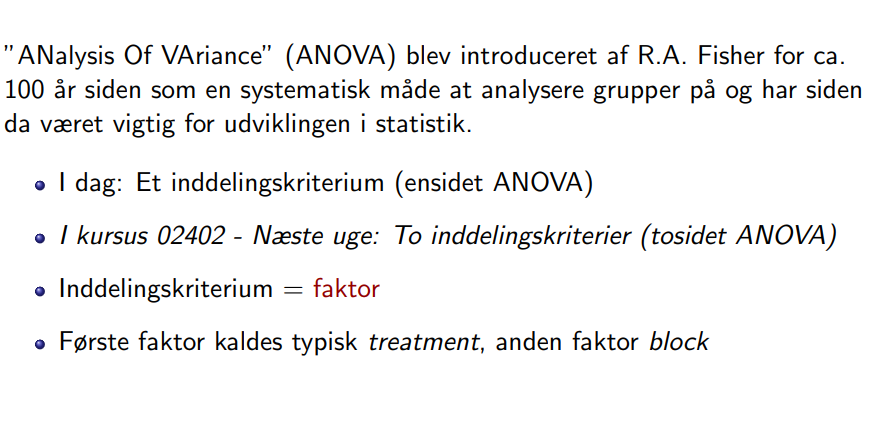

---

### Example: Intro to ANOVA

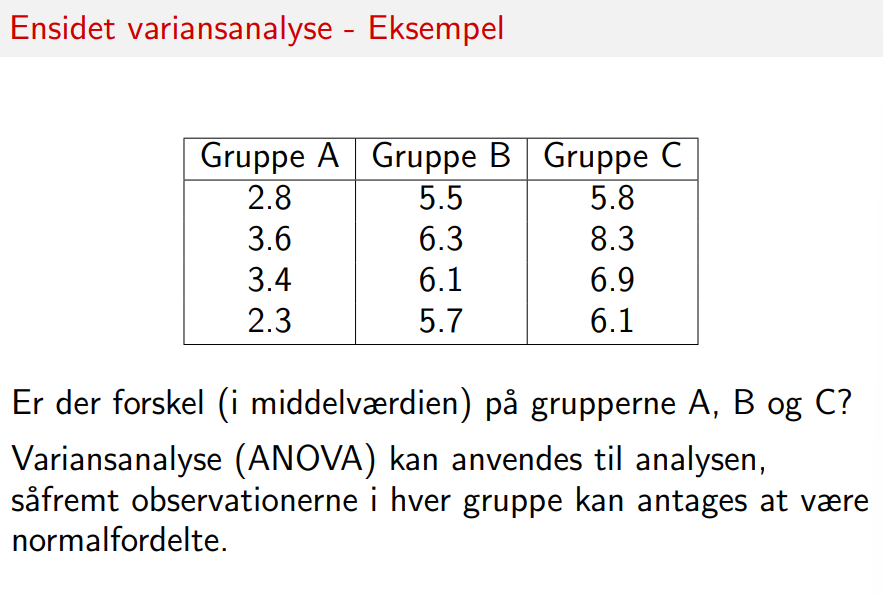

In [35]:
# Make pandas dataframe with grouped data:
data = pd.DataFrame({
    'value':  [2.8, 3.6, 3.4, 2.3, 5.5, 6.3, 6.1, 5.7, 5.8, 8.3, 6.9, 6.1], 
    'group':  ["A", "A", "A", "A", "B", "B", "B", "B", "C", "C", "C", "C"]})
data

,value,group
0,2.8,A
1,3.6,A
2,3.4,A
3,2.3,A
4,5.5,B
5,6.3,B
6,6.1,B
7,5.7,B
8,5.8,C
9,8.3,C


<Axes: xlabel='group', ylabel='value'>

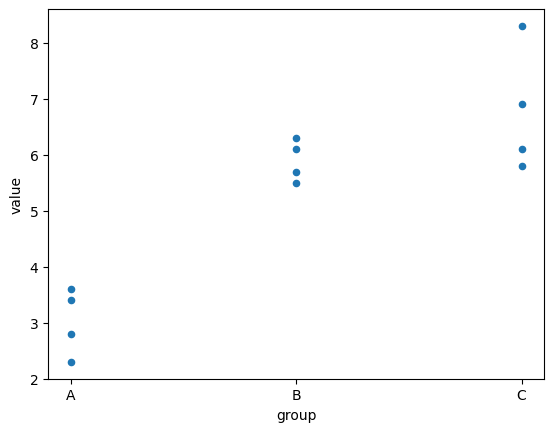

In [36]:
data.plot.scatter('group', 'value')


<Axes: title={'center': 'value'}, xlabel='[group]'>

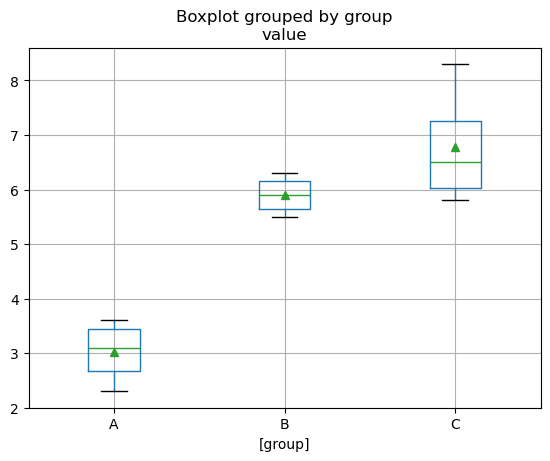

In [37]:
data.boxplot(by="group", showmeans=True)

The three groups have different means - indicated by the green triangles

<Axes: >

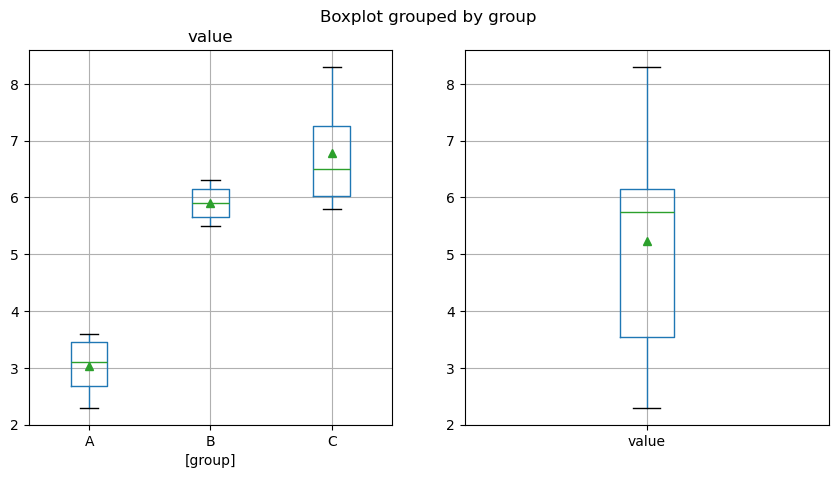

In [38]:
# compare visualising the three groups seperately versus all data pooled together:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.boxplot(by="group", ax=axs[0], showmeans=True)
data.boxplot(ax=axs[1], showmeans=True)

Questions:

Do you think there is a significant difference between the groups? (why? or why not? and what would make the difference more clear/more significant?)

Do you think the data in the three groups could each be a random subset of the pooled data?

<Axes: >

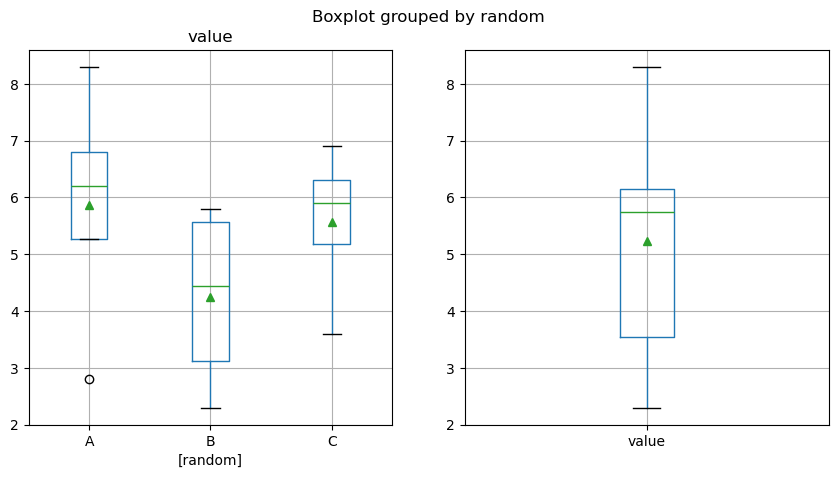

In [39]:
# lets make a random allocation of group and plot again (run this cell several times to simulate new random groups)
data["random"] = np.random.choice(data["group"], replace=False, size=len(data))

# compare visualising the three groups seperately versus all data pooled together:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
data.boxplot(by="random", ax=axs[0], showmeans=True)
data.boxplot(ax=axs[1], showmeans=True)


---

## **Model og hypoteste**

### Ensidet variansanalyse - Model

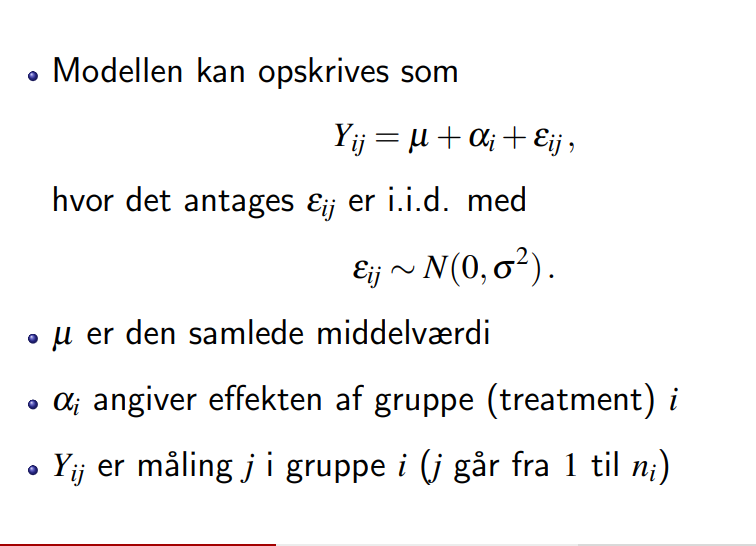

### 
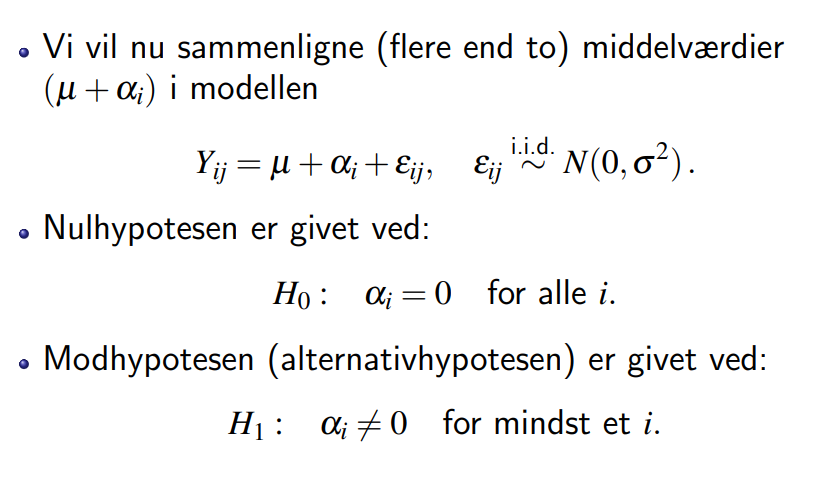

---

## **Beregning**: Variansdekomposition og ANOVA-tabellen

### Dekomposition og ANOVA-tabellen

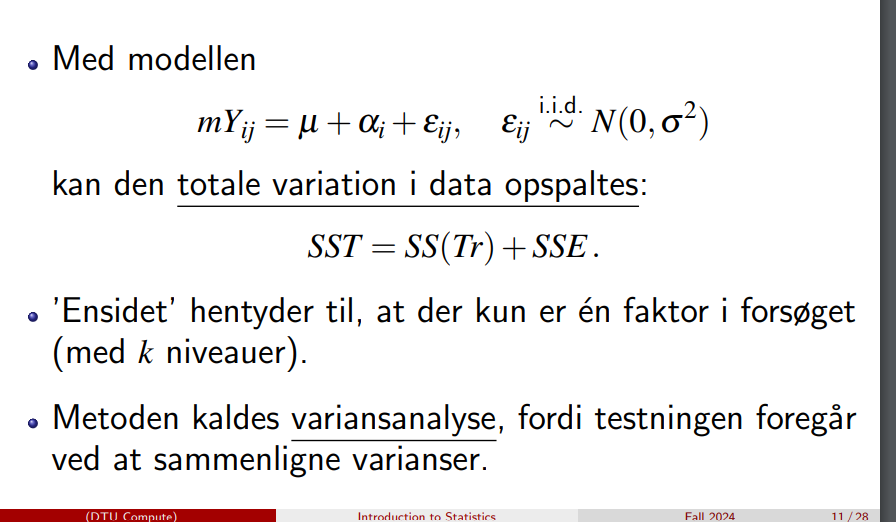

### SST, SS(Tr) og SSE
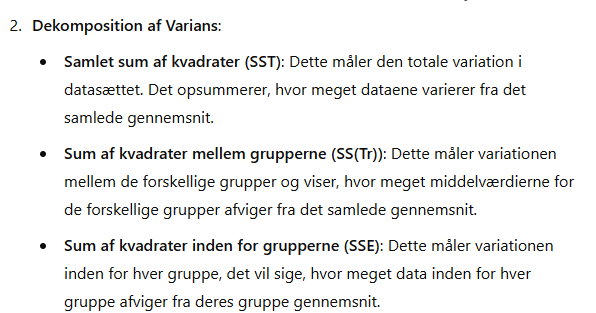

### Formler for kvadratafvigelsessummer (Den samlede varians,Variation inden for grupperne, Variation mellem grupperne )

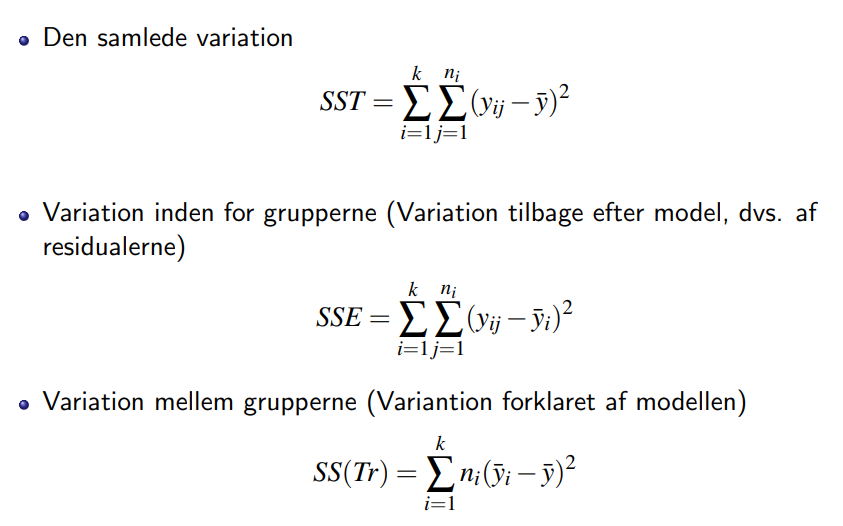


### Example: Estimate parameters $\mu$, $\alpha_i$ and $\sigma^2$

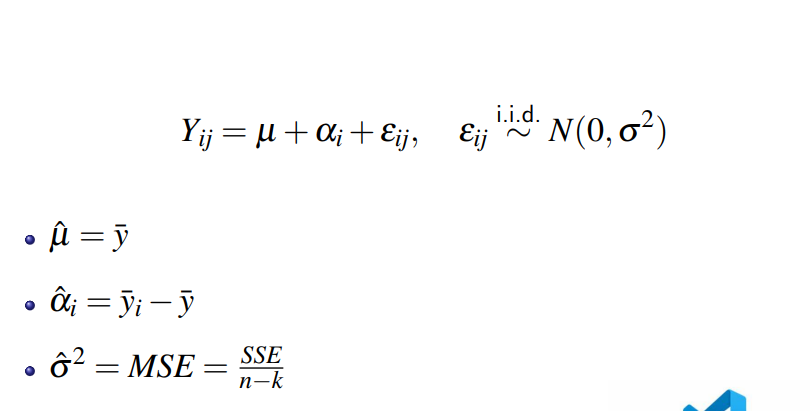

#### Forklaring:
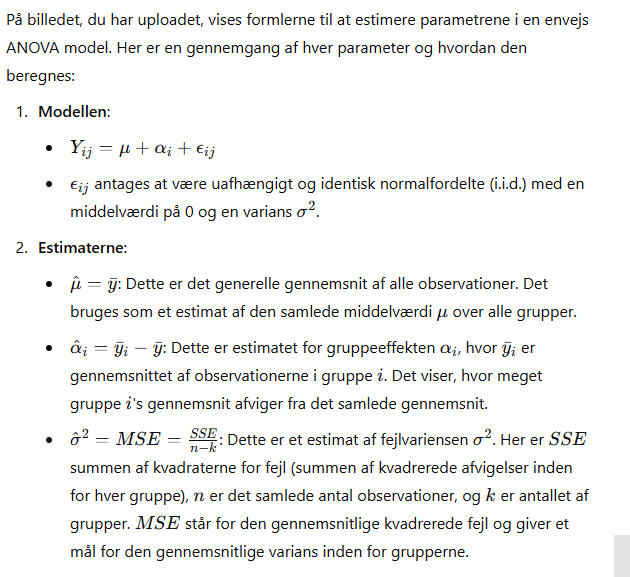


#### **Overall mean:**

In [40]:
# Compute the overall mean and add to dataframe:
data['overall_mean'] = data["value"].mean()
data

,value,group,random,overall_mean
0,2.8,A,A,5.233333
1,3.6,A,C,5.233333
2,3.4,A,B,5.233333
3,2.3,A,B,5.233333
4,5.5,B,B,5.233333
5,6.3,B,A,5.233333
6,6.1,B,A,5.233333
7,5.7,B,C,5.233333
8,5.8,C,B,5.233333
9,8.3,C,A,5.233333


#### **Group mean:**

In [41]:
# compute the mean within each group and add to dataframe:
data['group_mean'] = data.groupby("group")['value'].transform('mean')
data

,value,group,random,overall_mean,group_mean
0,2.8,A,A,5.233333,3.025
1,3.6,A,C,5.233333,3.025
2,3.4,A,B,5.233333,3.025
3,2.3,A,B,5.233333,3.025
4,5.5,B,B,5.233333,5.900
5,6.3,B,A,5.233333,5.900
6,6.1,B,A,5.233333,5.900
7,5.7,B,C,5.233333,5.900
8,5.8,C,B,5.233333,6.775
9,8.3,C,A,5.233333,6.775


#### **alpha for each group:**

In [42]:
# compute the "alpha" for each group and add to dataframe:
data["alpha"] = data["group_mean"] - data["overall_mean"]
data

,value,group,random,overall_mean,group_mean,alpha
0,2.8,A,A,5.233333,3.025,-2.208333
1,3.6,A,C,5.233333,3.025,-2.208333
2,3.4,A,B,5.233333,3.025,-2.208333
3,2.3,A,B,5.233333,3.025,-2.208333
4,5.5,B,B,5.233333,5.900,0.666667
5,6.3,B,A,5.233333,5.900,0.666667
6,6.1,B,A,5.233333,5.900,0.666667
7,5.7,B,C,5.233333,5.900,0.666667
8,5.8,C,B,5.233333,6.775,1.541667
9,8.3,C,A,5.233333,6.775,1.541667


#### **Individual contribution to SSE:**

In [43]:
# calculate the individual contribution to SSE and add to dataframe:
data['sse_contribution'] = (data['value']-data['group_mean'])**2
data

,value,group,random,overall_mean,group_mean,alpha,sse_contribution
0,2.8,A,A,5.233333,3.025,-2.208333,0.050625
1,3.6,A,C,5.233333,3.025,-2.208333,0.330625
2,3.4,A,B,5.233333,3.025,-2.208333,0.140625
3,2.3,A,B,5.233333,3.025,-2.208333,0.525625
4,5.5,B,B,5.233333,5.900,0.666667,0.160000
5,6.3,B,A,5.233333,5.900,0.666667,0.160000
6,6.1,B,A,5.233333,5.900,0.666667,0.040000
7,5.7,B,C,5.233333,5.900,0.666667,0.040000
8,5.8,C,B,5.233333,6.775,1.541667,0.950625
9,8.3,C,A,5.233333,6.775,1.541667,2.325625


#### **Calculate SSE and MSE:**

In [44]:
# calculate SSE and MSE:
SSE = data["sse_contribution"].sum()
MSE = SSE / (12-3)
print([SSE, MSE])

[5.195000000000004, 0.5772222222222226]


## **Example:** ANOVA table with python

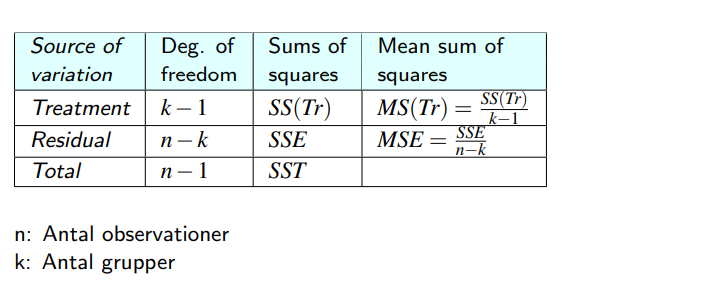

In [45]:
# Make the ANOVA table:
fit = smf.ols("value ~ group", data=data).fit()
anova_table = sm.stats.anova_lm(fit)
print(anova_table)


           df     sum_sq    mean_sq          F    PR(>F)
group     2.0  30.791667  15.395833  26.672281  0.000165
Residual  9.0   5.195000   0.577222        NaN       NaN


---

## **Hypotesetest (F-test):**

### Envejs variansanalyse - F-test
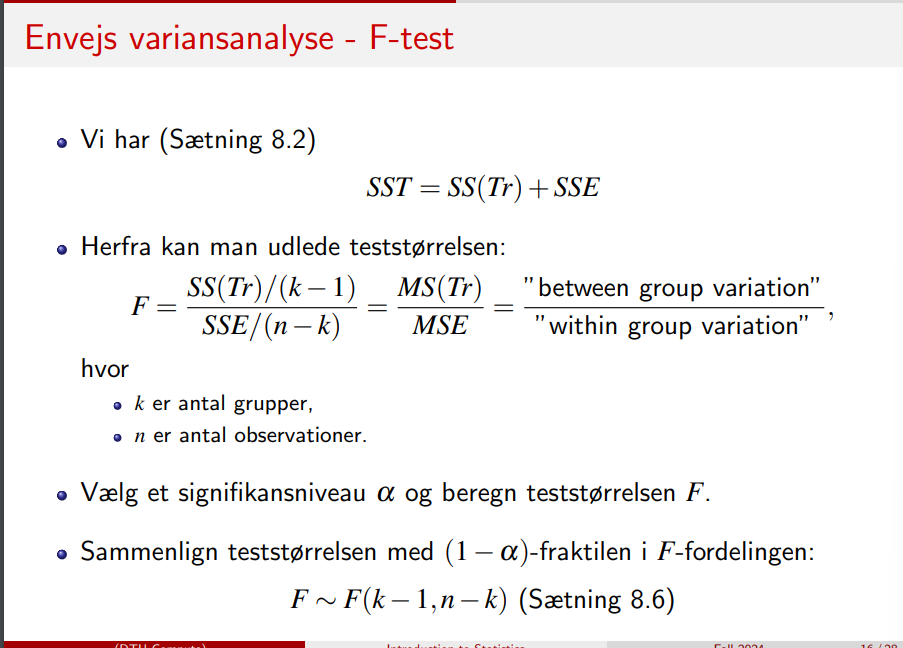

#### Forklaring:
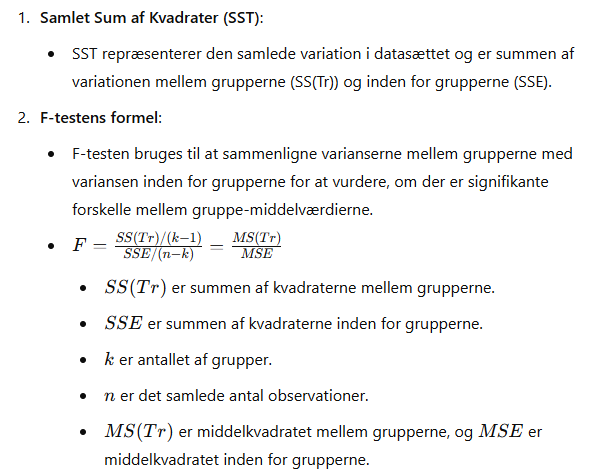

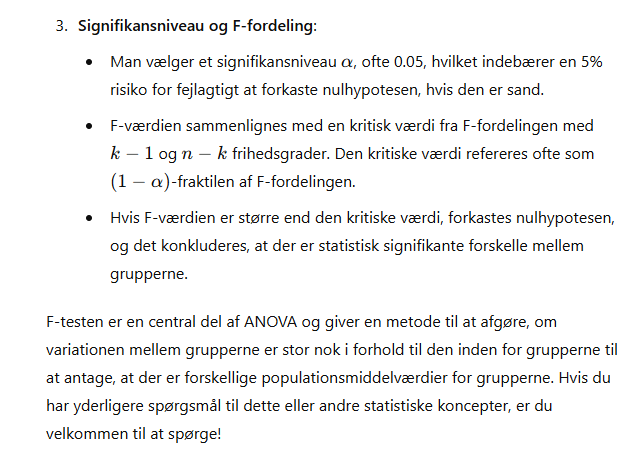

hvis f værdien er større end

### F-test fordeling:
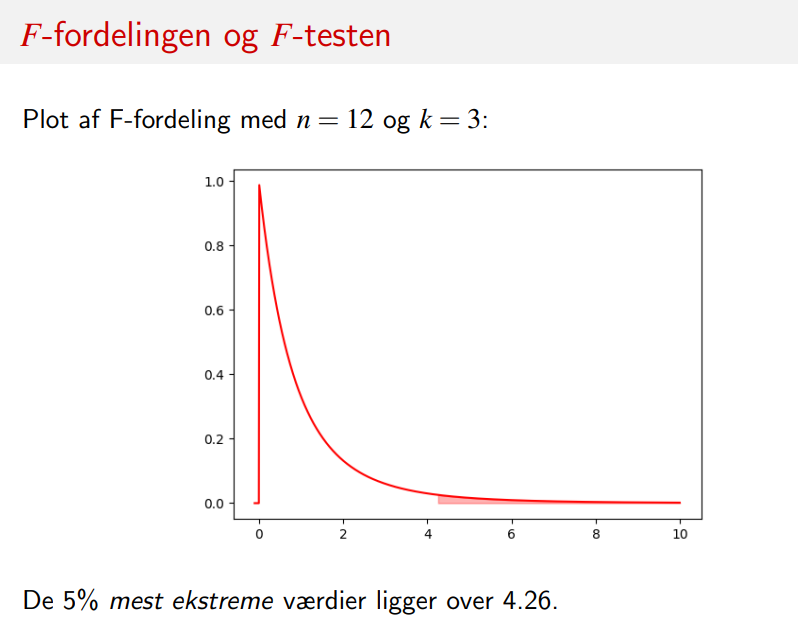




## **Example:** F-test

### F-test variationsanalyseskema:

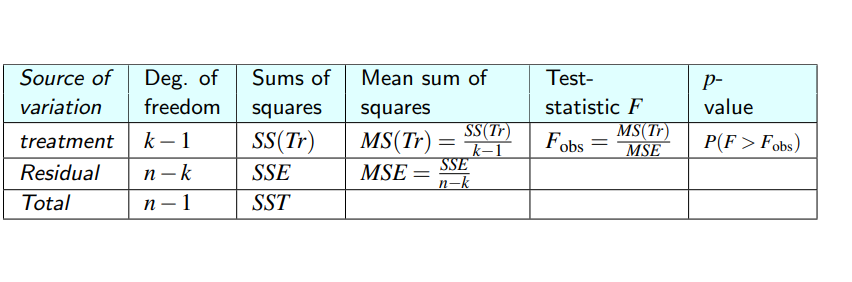

OBS: The F-test is also part of the ANOVA table output (see table above)

Here we also do the calculation *manually*

In [46]:
# We have already calculated SSE and MSE
print([SSE, MSE])

[5.195000000000004, 0.5772222222222226]


In [47]:
# recall the data:
data

,value,group,random,overall_mean,group_mean,alpha,sse_contribution
0,2.8,A,A,5.233333,3.025,-2.208333,0.050625
1,3.6,A,C,5.233333,3.025,-2.208333,0.330625
2,3.4,A,B,5.233333,3.025,-2.208333,0.140625
3,2.3,A,B,5.233333,3.025,-2.208333,0.525625
4,5.5,B,B,5.233333,5.900,0.666667,0.160000
5,6.3,B,A,5.233333,5.900,0.666667,0.160000
6,6.1,B,A,5.233333,5.900,0.666667,0.040000
7,5.7,B,C,5.233333,5.900,0.666667,0.040000
8,5.8,C,B,5.233333,6.775,1.541667,0.950625
9,8.3,C,A,5.233333,6.775,1.541667,2.325625


#### **Calculate SST contribution of each datapoint:**

In [48]:
# calculate SST contribution of each datapoint:
data["sst_contribution"] = (data["value"] - data["overall_mean"])**2
data

,value,group,random,overall_mean,group_mean,alpha,sse_contribution,sst_contribution
0,2.8,A,A,5.233333,3.025,-2.208333,0.050625,5.921111
1,3.6,A,C,5.233333,3.025,-2.208333,0.330625,2.667778
2,3.4,A,B,5.233333,3.025,-2.208333,0.140625,3.361111
3,2.3,A,B,5.233333,3.025,-2.208333,0.525625,8.604444
4,5.5,B,B,5.233333,5.900,0.666667,0.160000,0.071111
5,6.3,B,A,5.233333,5.900,0.666667,0.160000,1.137778
6,6.1,B,A,5.233333,5.900,0.666667,0.040000,0.751111
7,5.7,B,C,5.233333,5.900,0.666667,0.040000,0.217778
8,5.8,C,B,5.233333,6.775,1.541667,0.950625,0.321111
9,8.3,C,A,5.233333,6.775,1.541667,2.325625,9.404444


#### **Calculate SST:**

In [49]:
# calculate SST:
SST = data["sst_contribution"].sum()
print([SST])

[35.98666666666667]


#### **Calculate SSTr and MSTr:**

In [ ]:
# We know SST = SSTr + SSE
# Calculate SSTr and MSTr:
SSTr = SST - SSE

MSTr = SSTr / (3-1)

print([SSTr, MSTr])

[30.791666666666668, 15.395833333333334]


#### **Calculate the test-statistic F (F_obs) = MSTr / MSE:**

In [51]:
# Now we can calculate the test-statistic F = MSTr / MSE
Fobs = MSTr / MSE
print(Fobs)

26.672281039461


#### **Compare with critical value:**

In [52]:
# compare with critical value
print(stats.f.ppf(0.95, dfn = 3-1, dfd = 12-3))

4.25649472909375


#### **From Fobs we get a p-value:**

In [53]:
# From Fobs we get a p-value:
pvalue = 1 - stats.f.cdf(Fobs, dfn = 3-1, dfd = 12-3)
print(pvalue)

0.0001650052218172826


#### **Compare with values in ANOVA table:**

In [54]:
# compare with values in ANOVA table:
print(anova_table)

           df     sum_sq    mean_sq          F    PR(>F)
group     2.0  30.791667  15.395833  26.672281  0.000165
Residual  9.0   5.195000   0.577222        NaN       NaN


---

## **Variabilitet og sammenhæng med t-testen for to stikprøver**

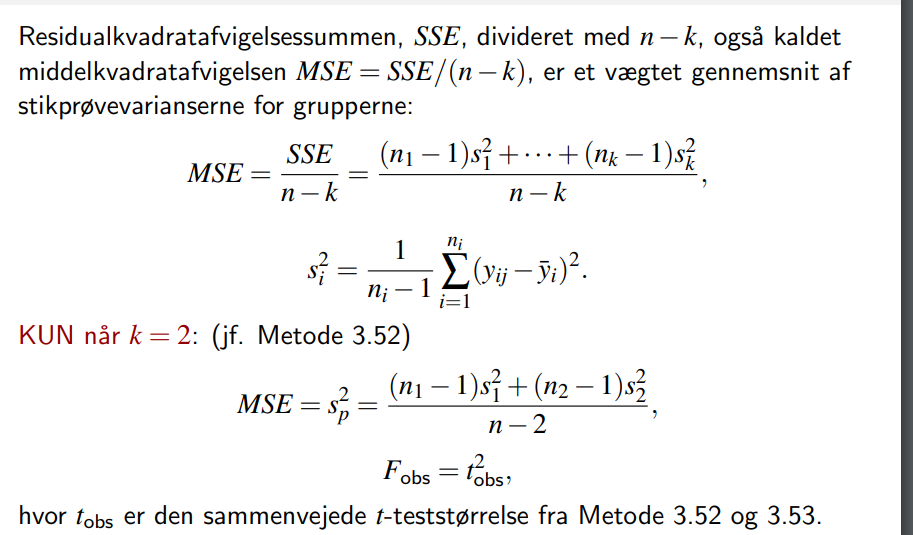

### Forklaring:
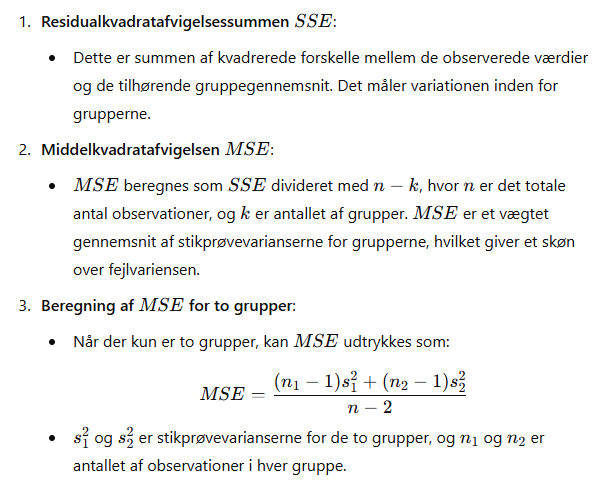

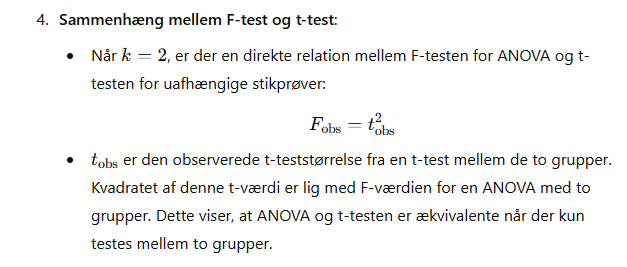

---

## **Post hoc sammenligninger** (after event)

### Post hoc konfidensintervaller:

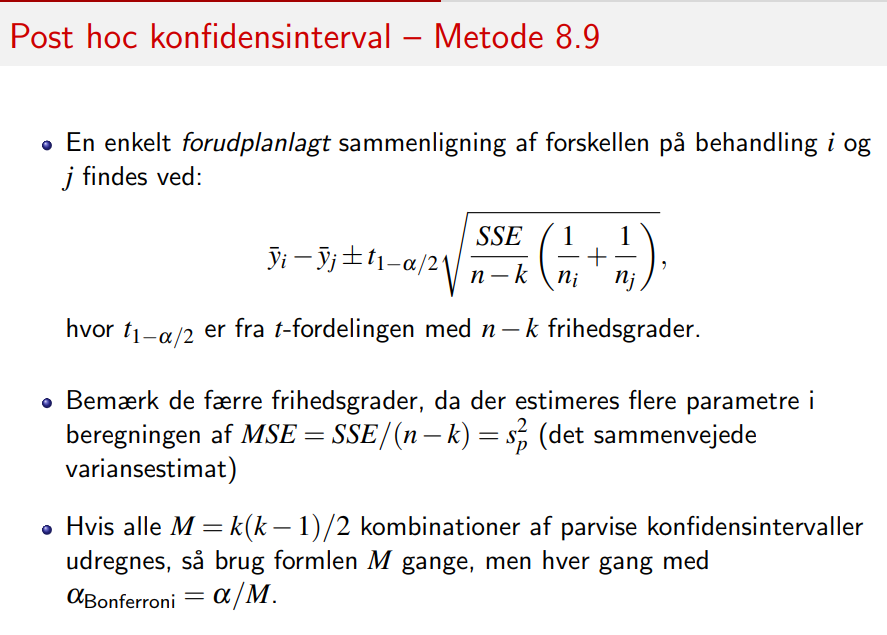

### Forklaring:

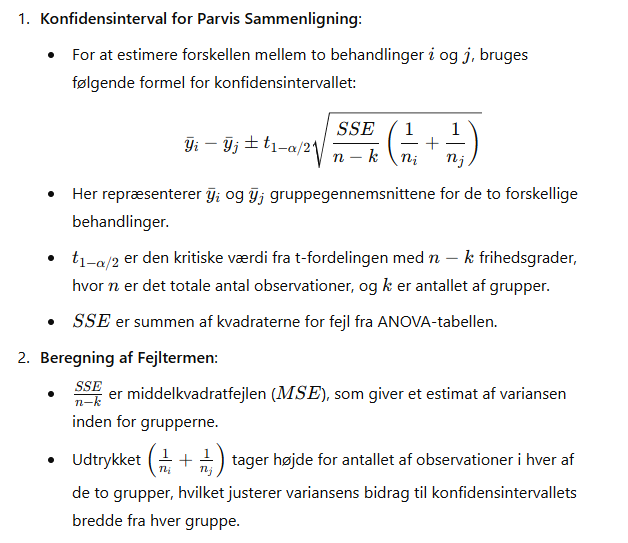

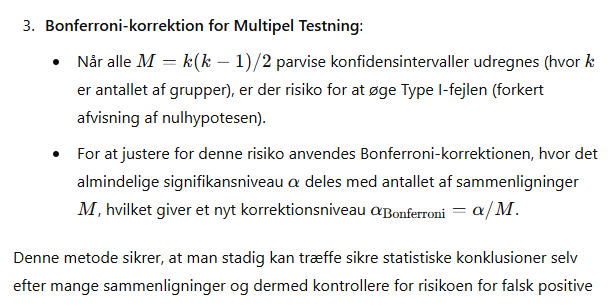

### Post hoc parvis hypotesetest:
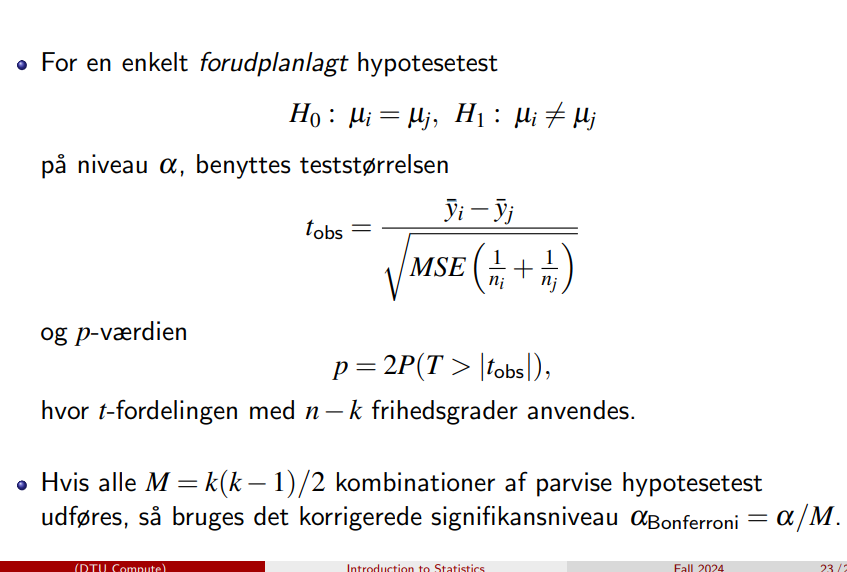


### Forklaring:
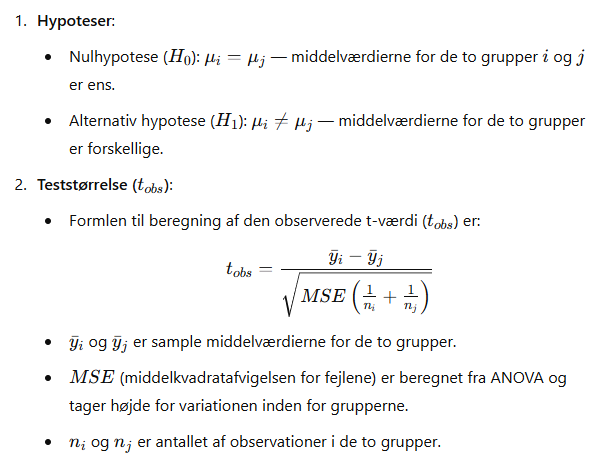

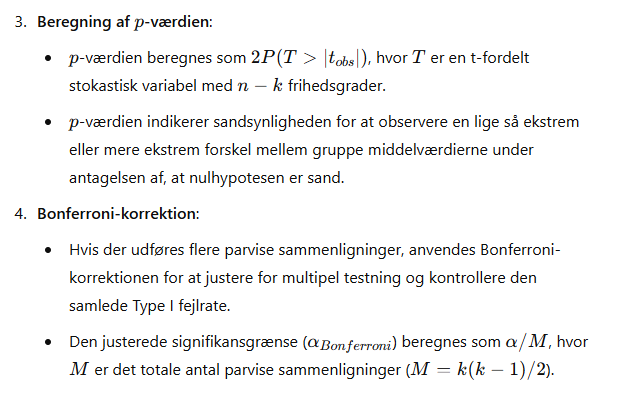

---

## **Modelkontrol**

### Example: Model control

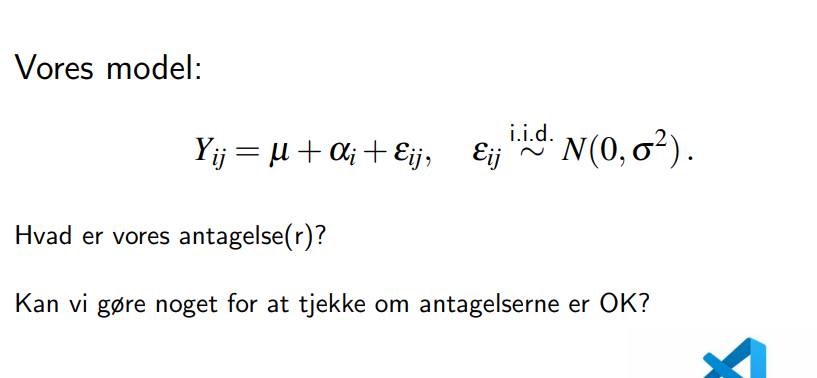

<Axes: title={'center': 'value'}, xlabel='group'>

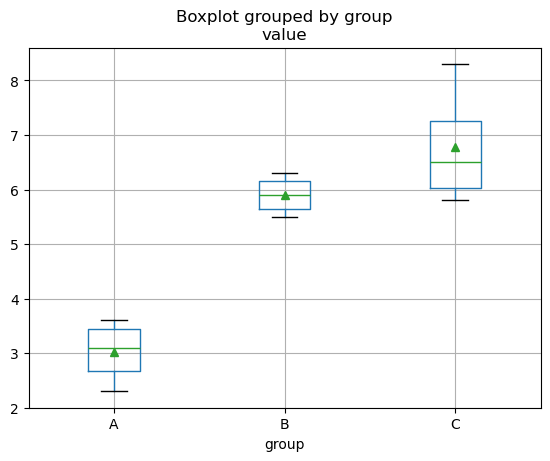

In [55]:
# Visual inspection of equal variance in groups:
data.boxplot("value", by="group", showmeans=True)

In [56]:
# recall how we computed the ANOVA table using Python:
# fit = smf.ols("value ~ group", data=data).fit()
# anova_table = sm.stats.anova_lm(fit)

# from the same "fit" we can get the residuals:
data["residual"] = fit.resid
data

,value,group,random,overall_mean,group_mean,alpha,sse_contribution,sst_contribution,residual
0,2.8,A,A,5.233333,3.025,-2.208333,0.050625,5.921111,-0.225
1,3.6,A,C,5.233333,3.025,-2.208333,0.330625,2.667778,0.575
2,3.4,A,B,5.233333,3.025,-2.208333,0.140625,3.361111,0.375
3,2.3,A,B,5.233333,3.025,-2.208333,0.525625,8.604444,-0.725
4,5.5,B,B,5.233333,5.900,0.666667,0.160000,0.071111,-0.400
5,6.3,B,A,5.233333,5.900,0.666667,0.160000,1.137778,0.400
6,6.1,B,A,5.233333,5.900,0.666667,0.040000,0.751111,0.200
7,5.7,B,C,5.233333,5.900,0.666667,0.040000,0.217778,-0.200
8,5.8,C,B,5.233333,6.775,1.541667,0.950625,0.321111,-0.975
9,8.3,C,A,5.233333,6.775,1.541667,2.325625,9.404444,1.525


OBS: you can check that: 

value = overall_mean + alpha + residual

Lets inspect the residuals behave as we have assumed:

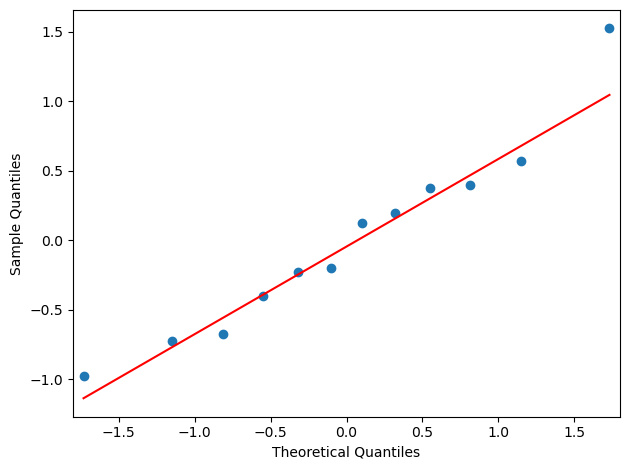

In [57]:
# Assumption about normality (residuals are normally distributed):

# QQplot:
sm.qqplot(data["residual"], line='q',a=1/2)
plt.tight_layout()
plt.show()

<Axes: xlabel='alpha', ylabel='residual'>

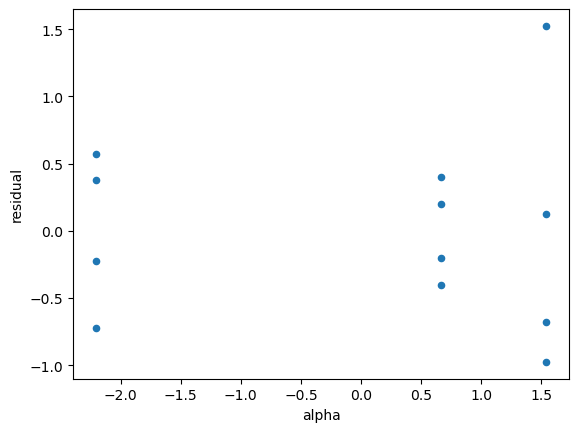

In [58]:
# residuals versus fitted values (overall_mean + alpha)
data.plot.scatter("alpha", "residual")

<Axes: xlabel='group', ylabel='residual'>

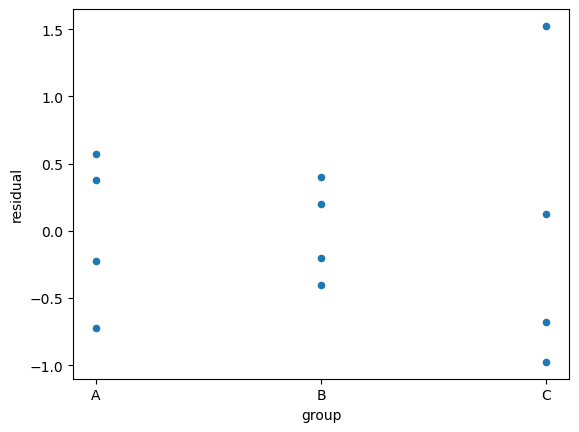

In [59]:
# residual versus group:
data.plot.scatter("group", "residual")

Maybe variance of residuals is a little larger in group C (we reached the same conclusion from looking at original boxplot)